In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
hr = pd.read_csv('HR.csv')
hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# Описание датафрема

- satisfaction_level — уровень удовлетворённости работой
- Last_evaluation — время с момента последней оценки в годах
- number_projects — количество проектов, выполненных за время работы
- average_monthly_hours — среднее количество часов на рабочем месте в месяц
- time_spend_company — стаж работы в компании в годах
- work_accident — происходили ли несчастные случаи на рабочем месте с сотрудником
- left — уволился ли сотрудник
- promotion_last_5years— повышался ли сотрудник за последние пять лет
- department — отдел, в котором работает сотрудник
- salary — относительный уровень зарплаты

-----------------
Нахождение основных статистических показателей: 
- Среднее 
- Мода 
- Станд. отлонение 
- Минимум / максимум

In [124]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [125]:
hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [126]:
hr.describe(include='object')

,department,salary
count,14999,14999
unique,10,3
top,sales,low
freq,4140,7316


-------------
Рассчитайте и визуализируйте корреляционную матрицу для количественных переменных. Определите две самые скоррелированные и две наименее скоррелированные переменные	

In [127]:
hr.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


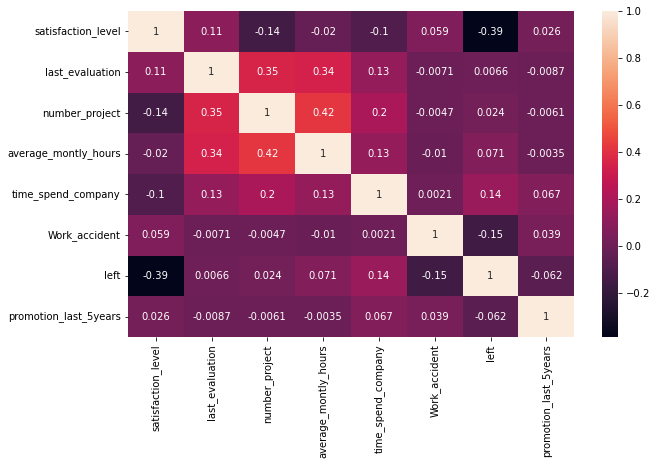

In [128]:
plt.figure(figsize=(10, 6))
sns.heatmap(hr.corr(), annot=True)
plt.show()

Конечно можно найти корреляции по графику, но на этом моменте мне стало скучно ;)

Поэтому реши сделать функцию, которая самостоятельно находит максимальное и минимальное значение, чтобы при больших объемах данных не тыкаться в Хитмап

In [252]:
def find_extreme_correlations(corr_matrix):
    """
    Находим две самые и наименее скоррелированные переменные
    """
    # Создаем копию матрицы без диагонали: заполняем ее NaN
    corr_no_diag = corr_matrix.copy()
    np.fill_diagonal(corr_no_diag.values, np.nan)
    
    # Находим максимальную корреляцию: т.к. диагонали у нас не осталось
    max_corr = corr_no_diag.stack().max()
    min_corr = corr_no_diag.stack().min()
    
    # Две переменные с максимальной корреляцией
    max_pairs = []
    for i in range(len(corr_matrix)):
        for j in range(i + 1, len(corr_matrix)):
            if corr_no_diag.iloc[i, j] == max_corr:
                max_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], max_corr))
    
    # Две переменные с минимальной корреляцией
    min_pairs = []
    for i in range(len(corr_matrix)):
        for j in range(i + 1, len(corr_matrix)):
            if corr_no_diag.iloc[i, j] == min_corr:
                min_pairs.append((corr_matrix.index[i], corr_matrix.columns[j], min_corr))
    
    return max_pairs, min_pairs

In [130]:
print(find_extreme_correlations(hr.corr()))

([('number_project', 'average_montly_hours', 0.41721063440177986)], [('satisfaction_level', 'left', -0.3883749834241161)])


-----
Рассчитайте сколько сотрудников работает в каждом департаменте	

In [131]:
# Важно поставить условие, что сотурдник не уволился 'left' == 0
hr[hr['left'] == 0].groupby('department')['department'].count()

department
IT              954
RandD           666
accounting      563
hr              524
management      539
marketing       655
product_mng     704
sales          3126
support        1674
technical      2023
Name: department, dtype: int64

----
Покажите распределение сотрудников по зарплатам	

In [132]:
salary_destrib = pd.DataFrame(hr[hr['left'] == 0].groupby('salary')['salary'].count())
salary_destrib

,salary
salary,
high,1155
low,5144
medium,5129


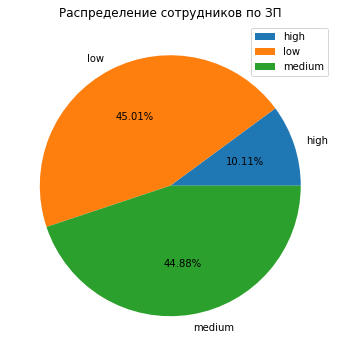

In [133]:
plt.figure(figsize=(10, 6), facecolor='white')
plt.pie(salary_destrib['salary'], labels=salary_destrib.index, autopct='%.2f%%')
plt.title('Распределение сотрудников по ЗП')
plt.legend()
plt.show()

--------
Покажите распределение сотрудников по зарплатам в каждом департаменте по отдельности	

In [135]:
departments = hr['department'].value_counts()

In [137]:
salary_by_departament = (hr[hr['left'] == 0].
 groupby(['department', 'salary'])
 .count()
 .reset_index()[['department', 'salary', 'satisfaction_level']]
 .rename(columns={'satisfaction_level' : 'salary_count'})
)

In [195]:
it_data = salary_by_departament[salary_by_departament['department'] == 'IT']
rnd = salary_by_departament[salary_by_departament['department'] == 'RandD']
accounting = salary_by_departament[salary_by_departament['department'] == 'accounting']
hr = salary_by_departament[salary_by_departament['department'] == 'hr']
management = salary_by_departament[salary_by_departament['department'] == 'management']
marketing = salary_by_departament[salary_by_departament['department'] == 'marketing']
product_mng = salary_by_departament[salary_by_departament['department'] == 'product_mng']
sales = salary_by_departament[salary_by_departament['department'] == 'sales']
support = salary_by_departament[salary_by_departament['department'] == 'support']
technical = salary_by_departament[salary_by_departament['department'] == 'technical']

In [196]:
it_data

,department,salary,salary_count
0,IT,high,79
1,IT,low,437
2,IT,medium,438


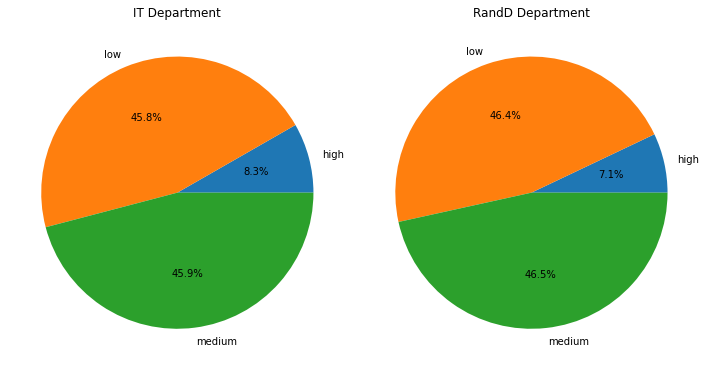

In [197]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), facecolor='white')

axes[0].pie(it_data['salary_count'], labels=it_data['salary'], autopct='%.1f%%')
axes[0].set_title('IT Department')

axes[1].pie(rnd['salary_count'], labels=rnd['salary'], autopct='%.1f%%')
axes[1].set_title('RandD Department')

plt.tight_layout()
plt.show()

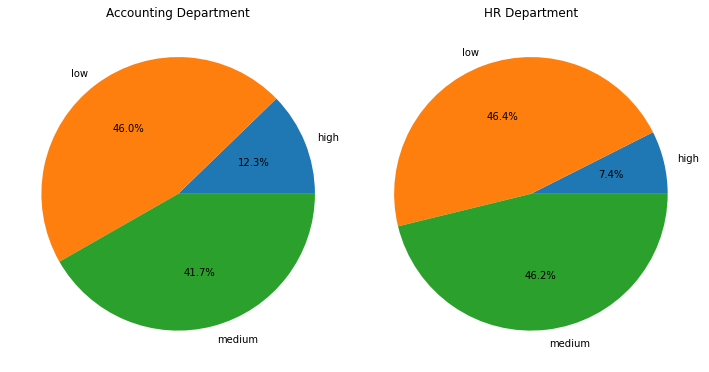

In [198]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), facecolor='white')

axes[0].pie(accounting['salary_count'], labels=accounting['salary'], autopct='%.1f%%')
axes[0].set_title('Accounting Department')

axes[1].pie(hr['salary_count'], labels=hr['salary'], autopct='%.1f%%')
axes[1].set_title('HR Department')

plt.tight_layout()
plt.show()

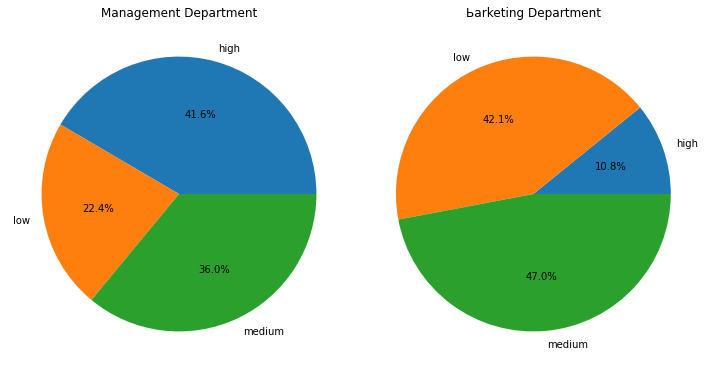

In [199]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), facecolor='white')

axes[0].pie(management['salary_count'], labels=management['salary'], autopct='%.1f%%')
axes[0].set_title('Management Department')

axes[1].pie(marketing['salary_count'], labels=marketing['salary'], autopct='%.1f%%')
axes[1].set_title('Ьarketing Department')

plt.tight_layout()
plt.show()

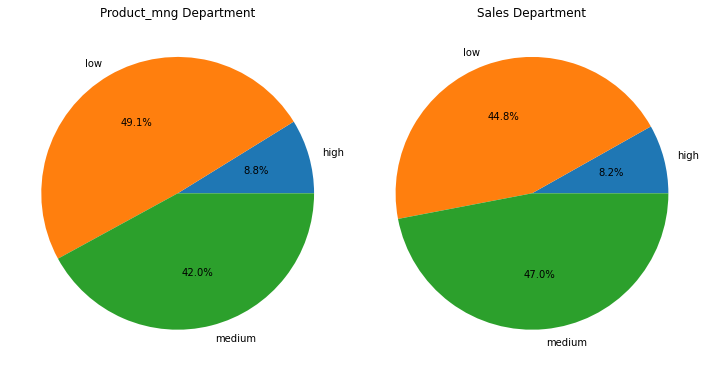

In [200]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), facecolor='white')

axes[0].pie(product_mng['salary_count'], labels=product_mng['salary'], autopct='%.1f%%')
axes[0].set_title('Product_mng Department')

axes[1].pie(sales['salary_count'], labels=sales['salary'], autopct='%.1f%%')
axes[1].set_title('Sales Department')

plt.tight_layout()
plt.show()

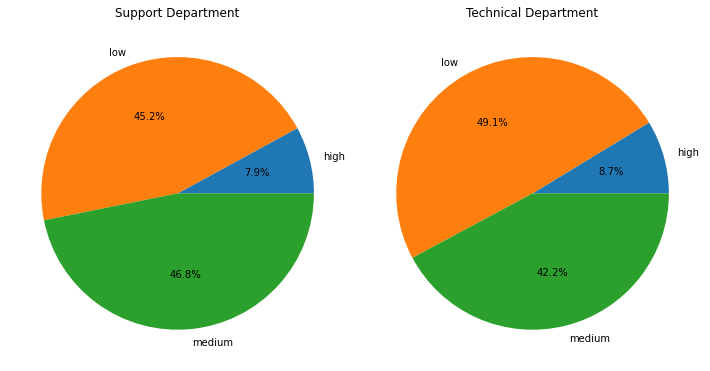

In [201]:
fig, axes = plt.subplots(1, 2, figsize=(10, 6), facecolor='white')

axes[0].pie(support['salary_count'], labels=support['salary'], autopct='%.1f%%')
axes[0].set_title('Support Department')

axes[1].pie(technical['salary_count'], labels=technical['salary'], autopct='%.1f%%')
axes[1].set_title('Technical Department')

plt.tight_layout()
plt.show()

-------
Проверьте гипотезу, что сотрудники с высоким окладом проводят на работе больше времени, чем сотрудники с низким окладом	

In [222]:
# Здесь специально не убираю уволенных сотрудников
salary_low = hr[hr['salary'].isin(['low'])]['average_montly_hours']
salary_high = hr[hr['salary'].isin(['high'])]['average_montly_hours']

In [231]:
len(salary_high), len(salary_low)

(1237, 7316)

In [232]:
salary_low = salary_low.sample(n=1237)

In [258]:
salary_low

4302     145
13824    265
2621     260
12564    157
4639     275
        ... 
13387    229
3011     210
821      244
5373     168
7156     166
Name: average_montly_hours, Length: 1237, dtype: int64

In [226]:
import scipy.stats as stats
from scipy.stats import shapiro

import warnings
warnings.filterwarnings('ignore')

In [263]:
def shapiro_calculation(data):
    stat, pval = shapiro(data)
    if pval > 0.05: 
        print('Данные распределены нормально')
    else:
        print('Данные не распредлены нормально')    
    print(f'Статистика: {stat:.5f}, pval: {pval:.5f}')
    sns.kdeplot(data, fill=True)
    plt.title('Распределение данных')
    print('-'*10)

Данные не распредлены нормально
Статистика: 0.96042, pval: 0.00000
----------
Данные не распредлены нормально
Статистика: 0.97121, pval: 0.00000
----------


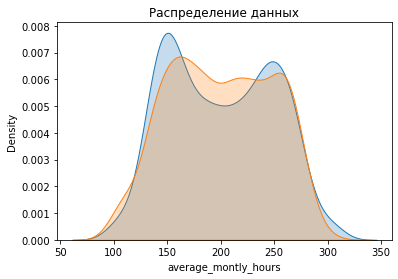

In [264]:
shapiro_calculation(salary_low)
shapiro_calculation(salary_high)

In [237]:
"""
Т.к. данные распределны ненормально, то использует тест Манна-Уитни
H0 - Нет разницы между ЗП в средних часах работы
H1 - Сотрудники с большей ЗП проводят больше вермени на работе
"""
stat, pval = stats.mannwhitneyu(salary_high, salary_low)
if pval < 0.05: 
    print('Принимаем H1 >> Сотрудники с большей ЗП проводят больше вермени на работе')
    print(f'Статистика: {stat:.5f}, pval: {pval:.5f}') 
else: 
    print('Принимаем H0 >> Нет разницы между ЗП в средних часах работы')
    print(f'Статистика: {stat:.5f}, pval: {pval:.5f}')

Принимаем H0 >> Нет разницы между ЗП в средних часах работы
Статистика: 770310.00000, pval: 0.76866


---------
Рассчитайте следующие показатели среди уволившихся и не уволившихся сотрудников (по отдельности):
1. Доля сотрудников с повышением за последние 5 лет 
2. Средняя степень удовлетворенности 
3. Среднее количество проектов	

In [251]:
print(f'Доля сотрудников с повышением за последние 5 лет: {len(hr[hr["promotion_last_5years"] == 1]) / len(hr) * 100}')
print(f'Средняя степень удовлетворенности: {hr["satisfaction_level"].mean()}')
print(f'Среднее количество проектов: {hr["number_project"].mean()}')

Доля сотрудников с повышением за последние 5 лет: 2.1268084538969263
Средняя степень удовлетворенности: 0.6128335222348166
Среднее количество проектов: 3.80305353690246


---
Разделите данные на тестовую и обучающую выборки. Постройте модель LDA, предсказывающую уволился ли сотрудник на основе имеющихся факторов (кроме department и salary). Оцените качество модели на тестовой выборке	

In [265]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [266]:
X = hr.drop(['left', 'department', 'salary'], axis=1)
y = hr['left']

In [267]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

y_pred = lda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [268]:
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:")
print(report)
print("\nConfusion Matrix:")
print(conf_matrix)

Accuracy: 0.7533

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.91      0.85      2294
           1       0.45      0.24      0.31       706

    accuracy                           0.75      3000
   macro avg       0.62      0.57      0.58      3000
weighted avg       0.71      0.75      0.72      3000


Confusion Matrix:
[[2094  200]
 [ 540  166]]
